In [2]:
# Multimodal Medical Data Augmentation
# This notebook processes medical images and radiology reports for augmentation.

In [3]:
# Import standard packages
import os
import glob
from PIL import Image
import xml.etree.ElementTree as ET
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Set base paths
image_folder = "data/raw/image/"
report_folder = "data/raw/ecgen-radiology/"
processed_folder = "data/processed/"

Image size: (512, 624)


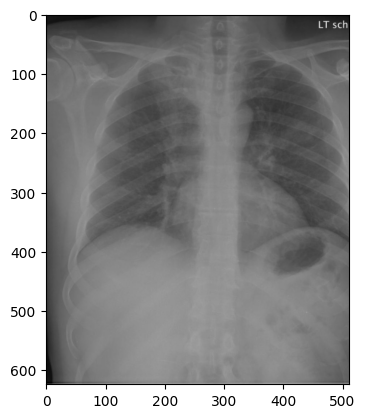

In [4]:
# Get list of image files sorted by name
image_files = sorted(glob.glob(image_folder + "*.png"))

# Example: load first image
img = Image.open(image_files[0])
print("Image size:", img.size)
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
# Get list of report files sorted by number
report_files = sorted(glob.glob(report_folder + "*.xml"), key=lambda x: int(os.path.basename(x).split(".")[0]))

# Example: load first report
tree = ET.parse(report_files[0])
root = tree.getroot()
text = "".join(root.itertext())
print("Report sample:", text[:200])

Report sample: 
   
   
   
   CXR
   
   open-access
   http://creativecommons.org/licenses/by-nc-nd/4.0/
   byncnd
   
   2013-08-01
   XR
   Indiana University
   Indiana University Chest X-ray Collection
   The 


In [7]:
# Match reports with their actual images from XML
all_pairs = []  # list of tuples: (report_file, [list of image files])

for report_file in report_files:
    tree = ET.parse(report_file)
    root = tree.getroot()
    # extract all parentImage ids
    image_ids = [pi.attrib['id'] for pi in root.findall(".//parentImage")]
    # map to actual file paths
    image_files_for_report = [os.path.join(image_folder, f"{img_id}.png") for img_id in image_ids]
    all_pairs.append((report_file, image_files_for_report))

# check first report
print("Number of reports with images:", len(all_pairs))
print("First report maps to images:", all_pairs[0][1])

Number of reports with images: 3955
First report maps to images: ['data/raw/image/CXR1_1_IM-0001-3001.png', 'data/raw/image/CXR1_1_IM-0001-4001.png']


In [9]:
# Example preprocessing functions
def preprocess_image(img, size=(224,224)):
    # Resize image
    img = img.resize(size)
    # Convert to numpy array
    arr = np.array(img)
    # Normalize between 0-1
    arr = (arr - arr.min()) / (arr.max() - arr.min())
    return arr

def preprocess_text(text):
    return text.lower().strip()

# Example augmentation functions
def augment_image(arr):
    return np.fliplr(arr)  # simple horizontal flip

def augment_text(text):
    return text[::-1]  # simple reverse as placeholder

In [10]:
# Example preprocessing on first report with multiple images
report_file, image_files_for_report = all_pairs[0]

# preprocess all images for this report
processed_images = [preprocess_image(Image.open(img)) for img in image_files_for_report]

# preprocess report text
tree = ET.parse(report_file)
text = "".join(tree.getroot().itertext())
text_pre = preprocess_text(text)

print("Processed", len(processed_images), "images for this report")
print("Text sample:", text_pre[:200])

Processed 2 images for this report
Text sample: cxr
   
   open-access
   http://creativecommons.org/licenses/by-nc-nd/4.0/
   byncnd
   
   2013-08-01
   xr
   indiana university
   indiana university chest x-ray collection
   the data are drawn f
